In [451]:
### Подгрузим пакеты 
import numpy as np
import pandas as pd
from IPython.display import Image
import scipy.stats as stats 
from numpy.random import seed  ### seed параметр генератора случайных чисел
import matplotlib.pyplot as plt  ### Пакет для построения графиков и прочего
import seaborn as sns
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from statistics import mean

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 



<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [452]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

### Используем t-test, так как выборки содержат числовые (непрерывные) величины и независимы
res_test = stats.ttest_ind(A, B, equal_var=False)
res_test

Ttest_indResult(statistic=-1.7338006472109972, pvalue=0.08511123469659897)

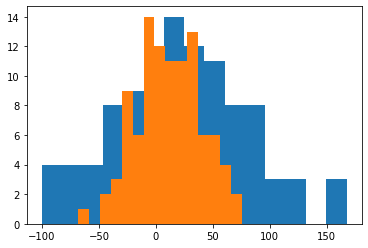

In [453]:
plt.hist(B, bins=15);
plt.hist(A, bins=15);

In [454]:
if (res_test.pvalue < 0.05):
    print('Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - **та же** группа людей, но получающая препарат
</div>

Statistics = 1930.000, p = 0.041
Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов


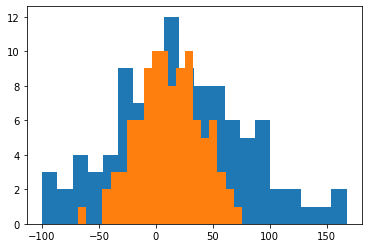

In [459]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = wilcoxon(A, B) ### Выполняем the Wilcoxon-Signed Rank Test
print('Statistics = %.3f, p = %.3f' % (stat, p))
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов')
else:
    print('Не отвергаем нулевую гипотезу')
    
plt.hist(B, bins=20);
plt.hist(A, bins=20);

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [462]:
from scipy.stats import f_oneway
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

12.525963044834192 2.9240047906326866e-05
Отвергаем нулевую гипотезу, есть различия в результатах


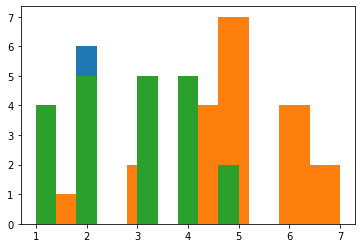

In [463]:
F, p = f_oneway(water, nutri, mineral)  ### Дисперсионный анализ 

alpha = 0.05                            ### Уровень значимости
print(F, p)                             ### Смотрим на результаты ДА


if (p < alpha):
    print('Отвергаем нулевую гипотезу, есть различия в результатах')
else:
    print('Не отвергаем нулевую гипотезу')
    
plt.hist(water)
plt.hist(nutri)
plt.hist(mineral)
plt.show()

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое памяти одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [464]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  ### Откроем датасет
pokemon.head()

 
### Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
### Что они имеют одинаковую значимость

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их.
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [465]:
grass = []
rock = []

for row in pokemon.iterrows():
    if row[1]['Class 1'] == 'Grass' and row[1]['Class 2'] != 'Rock':
        grass.append(row[1]['Attack'])
    elif row[1]['Class 2'] == 'Grass' and row[1]['Class 1'] != 'Rock':
        grass.append(row[1]['Attack'])
    elif row[1]['Class 1'] == 'Rock' and row[1]['Class 1'] != 'Grass':
        rock.append(row[1]['Attack'])
    elif row[1]['Class 2'] == 'Rock' and row[1]['Class 1'] != 'Grass':
        rock.append(row[1]['Attack'])

print(mean(grass), mean(rock))
print(stats.ttest_ind(grass, rock))

if mean(grass) > mean(rock):
    print('Покемоны в классе Grass имеют более сильную обычную атаку')
else:
    print('Покемоны в классе Rock имеют более сильную обычную атаку')

73.73118279569893 90.72413793103448
Ttest_indResult(statistic=-3.5342358607052775, pvalue=0.0005450424516898029)
Покемоны в классе Rock имеют более сильную обычную атаку


<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, правда ли, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их.
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [466]:
water = []
normal = []

for row in pokemon.iterrows():
    if row[1]['Class 1'] == 'Water' and row[1]['Class 2'] != 'Normal':
        water.append(row[1]['Speed'])
    elif row[1]['Class 2'] == 'Water' and row[1]['Class 1'] != 'Normal':
        water.append(row[1]['Speed'])
    elif row[1]['Class 1'] == 'Normal' and row[1]['Class 1'] != 'Water':
        normal.append(row[1]['Speed'])
    elif row[1]['Class 2'] == 'Normal' and row[1]['Class 1'] != 'Water':
        normal.append(row[1]['Speed'])

print(mean(normal), mean(water))
print(stats.ttest_ind(normal, water))

if mean(water) > mean(normal):
    print('Покемоны в классе Water в среднем более быстрые')
else:
    print('Покемоны в классе Normal в среднем более быстрые')

72.24509803921569 64.936
Ttest_indResult(statistic=2.157926415759382, pvalue=0.0319924752499949)
Покемоны в классе Normal в среднем более быстрые


<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Профессор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [467]:
# Покемоны, которые принимали сыворотку увеличения скорости.
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [468]:
# pokemon[(pokemon.Name in treathed_pokemon)].count()
non_threathed_speed = pokemon[~pokemon.Name.isin(treathed_pokemon)].Speed
threathed_speed = pokemon[pokemon.Name.isin(treathed_pokemon)].Speed

print(mean(non_threathed_speed), mean(threathed_speed))
print(stats.ttest_ind(non_threathed_speed, threathed_speed))

if mean(non_threathed_speed) >= mean(threathed_speed):
    print('Сыворотка не работает')
else:
    print('Сыворотка работает')

67.89195979899498 145
Ttest_indResult(statistic=-5.385407401082377, pvalue=9.51510117630786e-08)
Сыворотка работает


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных `Legendary` покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [469]:
normal_sum = []
legendary_sum = []
normal_mult = []
legendary_mult = []

for row in pokemon.iterrows():
    pokemon_sum = row[1]['HP'] + row[1]['Attack'] + row[1]['Defense']
    pokemon_mult = row[1]['HP'] * row[1]['Attack'] * row[1]['Defense']
    if row[1]['Legendary']:
        legendary_sum.append(pokemon_sum)
        legendary_mult.append(pokemon_mult)
    else:
        normal_sum.append(pokemon_sum)
        normal_mult.append(pokemon_mult)

print(mean(normal_sum), mean(legendary_sum))
print(stats.ttest_ind(normal_sum, legendary_sum))
print(mean(normal_mult), mean(legendary_mult))
print(stats.ttest_ind(normal_mult, legendary_mult))

214.4108843537415 309.0769230769231
Ttest_indResult(statistic=-11.591852366462316, pvalue=7.970942205722087e-29)
425041.38911564625 1085941.6153846155
Ttest_indResult(statistic=-13.263253408231844, pvalue=1.992664308842282e-36)


Профессор Оук был прав на счёт Legendary покемонов

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые, на его взгляд, одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [470]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [471]:
groups = {
    'Rock': [],
    'Ground': [],
    'Steel': [],
    'Ice': []
}
for row in pokemon.iterrows():
    for best_class in best_defence_class:
        if row[1]['Class 1'] == best_class:
            groups[best_class].append(row[1]['Defense'])
        elif row[1]['Class 2'] == best_class:
            groups[best_class].append(row[1]['Defense'])

print(f_oneway(groups['Rock'], groups['Ground'], groups['Steel'], groups['Ice']))

F_onewayResult(statistic=10.82012408304731, pvalue=1.231528168152447e-06)


Профессор Оук прав